**Regularization:**

Regularization ek technique hai machine learning me, jisse model overfitting se bacha rahe.

Overfitting matlab:
Model training data ko itna achha yaad kar leta hai ki wo mistakes bhi seekh leta hai. Fir jab new data aata hai, model galat predict karta hai.

Regularization ka kaam:
Regularization training ke time model ko punish karta hai agar wo bahut complex ho raha ho.
It adds an extra term to the loss function, taaki model simple aur general ban sake.

🔸 Types of Regularization:
1. L1 Regularization (Lasso)
It makes some model weights exactly zero.

So, it removes unimportant features.

This is helpful when you want feature selection.

✅ Simple Example:

Imagine you have 10 books to study.
L1 says: “Study only the 3 most important books, skip the rest.”

2. L2 Regularization (Ridge)
It makes all weights smaller, but none are zero.

So, all features are kept, but their effect is reduced.

This makes the model smooth and less sensitive.

✅ Simple Example:

You have 10 books to study.
L2 says: “Study all 10 books, but just a little from each one.”

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
df=pd.read_csv('Housing.csv')
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


please check will apply linear regression

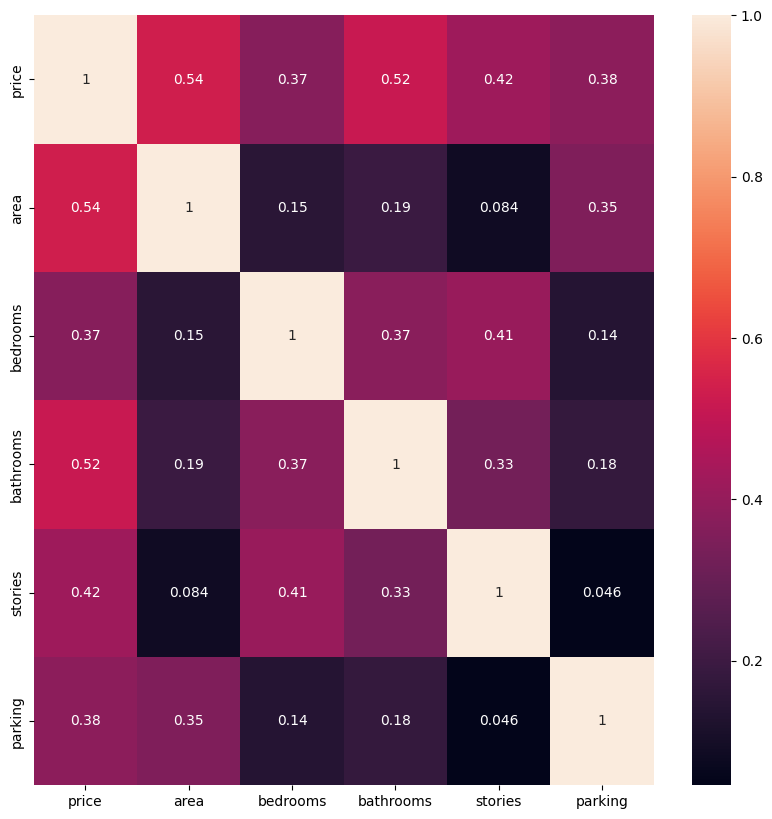

In [10]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,10)) 
sns.heatmap(data=numeric_df.corr(), annot=True)
plt.show()

In [11]:
x=df.iloc[:,:-1]
y=df["furnishingstatus"]

In [12]:
# Convert non-numeric columns to numeric
x = pd.get_dummies(x, drop_first=True)

In [14]:
sl=StandardScaler()
x_scaled = sl.fit_transform(x)

# Convert back to DataFrame
x = pd.DataFrame(x_scaled, columns=x.columns) 

In [15]:
x

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.554035
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["furnishingstatus"])


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

**LinearRegression**

In [32]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100 

2.8483319816072883

In [33]:
lr.coef_

array([-0.20205605,  0.03654158,  0.00657589,  0.03108353, -0.04520773,
       -0.06569575, -0.06036896, -0.00894049, -0.07245169, -0.00813358,
       -0.0098828 ,  0.01531345])

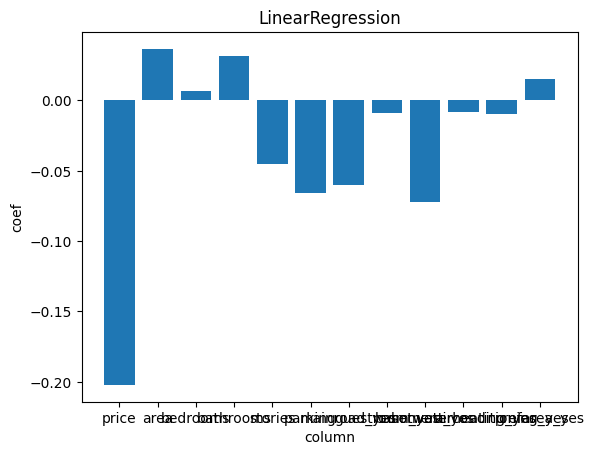

In [39]:
plt.Figure(figsize=(25,10))
plt.bar(x.columns,lr.coef_)
plt.title('LinearRegression')
plt.xlabel('column')
plt.ylabel('coef')
plt.show()

**Lasso(L1)** that use for feature selection

feature selection mean that remove the unwanted columns

In [58]:
# la=Lasso(alpha=0.01)
# or 
# la=Lasso(alpha=0.5)
# or 
la=Lasso(alpha=10)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

-0.4040876302431329

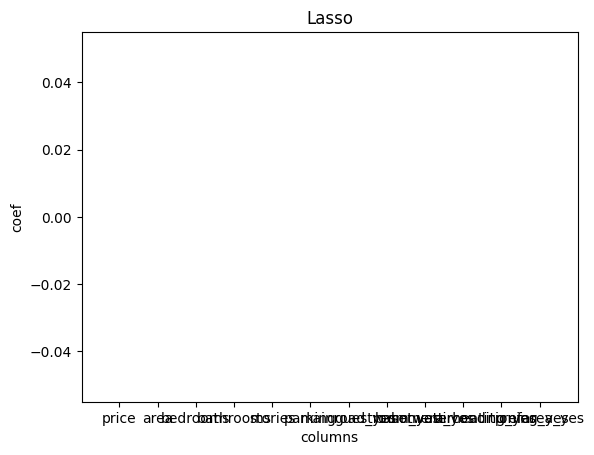

In [59]:
plt.Figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel('coef')
plt.show()

**Ridge** means all features are kept, but their effect is reduced.

In [68]:
# ri=Ridge(alpha=10)
# ri=Ridge(alpha=0.5)
ri=Ridge(alpha=0.1)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)

0.028530318778025254

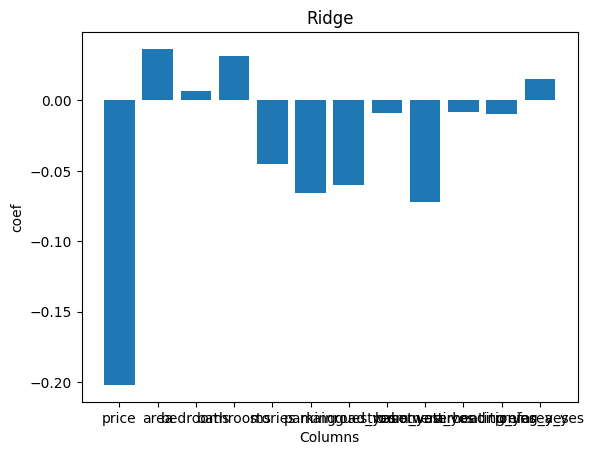

In [69]:
plt.Figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.show()

we can find which is the best of three

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [76]:
# for LinearRegression
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))
# y_test=Actual data
# lr.predict(x_test)=preduction data

0.6121348260126992
0.6528965180210886
0.7823904562382514


In [77]:
# for Lasso
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))
# y_test=Actual data
# lr.predict(x_test)=preduction data

0.6326277249389785
0.6569733187442134
0.7953789819570155


In [78]:
# for Ridge
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))
# y_test=Actual data
# lr.predict(x_test)=preduction data

0.6121052128295349
0.6528911052400972
0.782371531198276


In [80]:
df=pd.DataFrame({'col_name':x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

In [81]:
df

,col_name,LinearRegression,Lasso,Ridge
0,price,-0.202056,-0.0,-0.201902
1,area,0.036542,-0.0,0.036485
2,bedrooms,0.006576,-0.0,0.006565
3,bathrooms,0.031084,-0.0,0.031022
4,stories,-0.045208,-0.0,-0.045216
5,parking,-0.065696,-0.0,-0.065693
6,mainroad_yes,-0.060369,-0.0,-0.060367
7,guestroom_yes,-0.008940,-0.0,-0.008953
8,basement_yes,-0.072452,-0.0,-0.072443
9,hotwaterheating_yes,-0.008134,-0.0,-0.008146
